In [ ]:
!pip install Factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

# Turma

In [ ]:
#dados = pd.read_excel("Person_versao_turma_2.xlsx")
dados = pd.read_csv("dados.csv")
dados

,Idade (apenas números),Escolaridade,Gênero,Estou disposto a sugestões de amigos sobre diversos tipos de música,"Frequentemente, sou confiante ao tomar decisões",Costumo me destacar em grupos,Frequentemente me sinto desmotivado,Tomo decisões de maneira impulsiva,Imagino que meu futuro será marcado por mais experiências desagradáveis do que agradáveis,Acredito que verdades são universais e permanentes,...,Item 18,Item 19,"Estou deliberadamente tentando perder peso, comendo menos:",Item 20,Item 21,A minha vida está próxima do meu ideal.,Minhas condições de vida são excelentes.,Eu estou satisfeito com a minha vida.,Até agora eu tenho conseguido as coisas importantes que eu quero na vida.,Se eu pudesse viver a minha vida de novo eu não mudaria quase nada.
0,21,Ensino superior incompleto,Feminino,4,4,5,5,2,1,2,...,Meu apetite não é tão bom quanto costumava ser,"Não perdi muito peso, se é que perdi algum ult...",Não,Preocupo-me com problemas físicos como dores e...,Estou menos interessado por sexo que costumava,5,7,6,6,1
1,20,Ensino superior incompleto,Feminino,3,4,4,5,1,2,1,...,Meu apetite não é tão bom quanto costumava ser,"Não perdi muito peso, se é que perdi algum ult...",Sim,Não me preocupo mais que o de hábito com minha...,Estou menos interessado por sexo que costumava,2,5,1,5,1
2,16,Ensino médio,Feminino,4,1,3,5,4,5,3,...,Meu apetite não está pior do que de hábito,"Não perdi muito peso, se é que perdi algum ult...",Sim,Preocupo-me com problemas físicos como dores e...,Estou bem menos interessado em sexo atualmente,1,2,1,1,1
3,19,Ensino superior incompleto,Feminino,5,2,2,5,4,2,1,...,Não tenho mais nenhum apetite,"Perdi mais de 7,5 Kg",Sim,Preocupo-me com problemas físicos como dores e...,Não tenho observado qualquer mudança recente e...,6,4,7,5,3
4,19,Ensino superior incompleto,Feminino,4,3,2,4,4,1,1,...,Meu apetite não é tão bom quanto costumava ser,"Perdi mais de 2,5 Kg",Não,Preocupo-me com problemas físicos como dores e...,Não tenho observado qualquer mudança recente e...,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,24,Ensino superior incompleto,Feminino,5,4,3,3,3,1,1,...,Meu apetite não está pior do que de hábito,"Não perdi muito peso, se é que perdi algum ult...",Não,Preocupo-me com problemas físicos como dores e...,Não tenho observado qualquer mudança recente e...,5,4,5,5,4
166,27,Ensino superior incompleto,Feminino,1,4,3,4,4,2,1,...,Meu apetite está muito pior agora,"Não perdi muito peso, se é que perdi algum ult...",Sim,Estou muito preocupado com problemas físicos e...,Estou menos interessado por sexo que costumava,4,5,4,3,1
167,NaN,Ensino superior incompleto,Feminino,2,3,5,5,1,4,5,...,Meu apetite não está pior do que de hábito,"Não perdi muito peso, se é que perdi algum ult...",Sim,Preocupo-me com problemas físicos como dores e...,Estou bem menos interessado em sexo atualmente,2,1,3,3,4
168,23,Ensino superior incompleto,Feminino,5,4,5,2,1,1,1,...,Meu apetite não está pior do que de hábito,"Não perdi muito peso, se é que perdi algum ult...",Não,Não me preocupo mais que o de hábito com minha...,Não tenho observado qualquer mudança recente e...,1,1,4,6,7


In [ ]:
[x for x in dados['Idade (apenas números)']] == int()

False

In [ ]:
dados['Idade (apenas números)'][dados['Idade (apenas números)'] == int()]

Series([], Name: Idade (apenas números), dtype: object)

In [ ]:
inventario_perso = dados.iloc[:, 3:112]

## Personalidade

In [ ]:
# separando itens em seus fatores

fator1 = "H25 H37 H44 H52 H82 H4 H81 H93 H27 H18 H88 H73 H40 H2 H30 H50 H70".split() 
fator2 = "H65	H94	H90	H58	H100 H45 H9 H102 H41	H42	H24	H87	H104 H8	H79	H97	H107 H28".split()
fator3 = 'H29	H3 H109	H20	H89	H101 H22 H76 H48 H67 H55 H78	H83	H32	H96	H34'.split()
fator4 = 'H57	H33	H11	H31	H49	H13	H74	H59	H17	H46	H12'.split()
fator5 = 'H95	H26	H108 H71 H56 H51 H47 H99'.split()

fator1 = [int(x[1:]) - 1 for x in fator1]
fator2 = [int(x[1:]) - 1 for x in fator2]
fator3 = [int(x[1:]) - 1 for x in fator3]
fator4 = [int(x[1:]) - 1 for x in fator4]
fator5 = [int(x[1:]) - 1 for x in fator5]

itens_fator1 = inventario_perso.columns[fator1]
itens_fator2 = inventario_perso.columns[fator2]
itens_fator3 = inventario_perso.columns[fator3]
itens_fator4 = inventario_perso.columns[fator4]
itens_fator5 = inventario_perso.columns[fator5]

# itens invertidos

itens_invertidos = inventario_perso.columns[[[int(x[1:]) - 1 for x in "H12 H13 H31 H101 H76 H2 H30".split()]]]

# printando os itens

print(" neuroticismo: \n")
for x in itens_fator1.to_list():
  print(x)
print("\n Amabilidade: \n")
for x in itens_fator2.to_list():
  print(x)
print("\n Extroversão: \n")
for x in itens_fator3.to_list():
  print(x)
print("\n conscienciosidade: \n")
for x in itens_fator4.to_list():
  print(x)
print("\n Abertura: \n")
for x in itens_fator5.to_list():
  print(x)
print("\n Invertidos: \n")
for x in itens_invertidos.to_list():
  print(x)

 neuroticismo: 

Costumo ter pensamentos negativos sobre mim
Me sinto insegura/inseguro em vários aspectos da minha vida
Às vezes penso que os outros ficariam melhores sem mim
Frequentemente me sinto triste
Quando dificuldades surgem no meu dia-a-dia tenho a tendência de culpar a mim mesmo
Frequentemente me sinto desmotivado
Meu humor varia constantemente
Costumo me preocupar muito com acontecimentos passados
Me sinto responsável pelos acontecimentos ruins ao meu redor
Frequentemente sinto que atrapalho as pessoas ao meu redor
Costumo chorar sem motivo aparente
Fico nervoso/a com facilidade
Costumo me estressar com facilidade
Frequentemente, sou confiante ao tomar decisões 
Geralmente lido bem com as frustrações
Deixo de fazer coisas por medo de ser criticado
Tenho dificuldade de continuar as tarefas quando os problemas surgem

 Amabilidade: 

Tomo cuidado com o que digo
Busco tratar todas as pessoas com respeito
Busco sempre entender o que os outros sentem
Costumo tratar bem as pessoa

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:5069: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [ ]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [ ]:
def inverte_numero(lista_de_numeros):
  return [6 - x  for x in lista_de_numeros]

In [ ]:
for x in itens_invertidos:
  inventario_perso[x] = inverte_numero(inventario_perso[x])

# verificando se deu certo
inventario_perso[itens_invertidos[0]]

0      1
1      5
2      2
3      4
4      5
      ..
165    4
166    2
167    5
168    4
169    4
Name: Na maioria das vezes, não consigo terminar minhas atividades por completo, Length: 170, dtype: int64

In [ ]:
inventario_perso

,Estou disposto a sugestões de amigos sobre diversos tipos de música,"Frequentemente, sou confiante ao tomar decisões",Costumo me destacar em grupos,Frequentemente me sinto desmotivado,Tomo decisões de maneira impulsiva,Imagino que meu futuro será marcado por mais experiências desagradáveis do que agradáveis,Acredito que verdades são universais e permanentes,"Ajo com sensatez, sempre pensando nas consequências dos meus atos",Penso bem antes de falar ou fazer algo,Utilizo de meios práticos para concretizar meus objetivos,...,Busco sempre fazer o que é certo,Sinto desconforto ao falar em público.1,Busco sempre tomar responsabilidade pelas minhas atitudes,Tenho necessidade de troca social de maneira frequente,Busco ser honesto com as outras pessoas,Busco mudar meus percursos diários sempre que possível,Me considero uma pessoa criativa,Costumo me relacionar bem com as pessoas ao seu redor,Acredito que regras foram feitas para serem quebradas,Costumo ficar à vontade em grupos
0,4,2,5,5,2,1,2,5,5,3,...,5,5,5,3,5,2,5,5,3,5
1,3,2,4,5,1,2,1,4,5,5,...,4,5,4,3,5,1,4,5,1,5
2,4,5,3,5,4,5,3,2,2,4,...,3,3,2,4,3,2,3,2,4,3
3,5,4,2,5,4,2,1,2,3,2,...,5,2,5,5,5,3,4,5,3,3
4,4,3,2,4,4,1,1,3,2,5,...,5,1,4,3,5,1,1,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,2,3,3,3,1,1,3,3,3,...,5,5,5,3,5,2,3,4,1,4
166,1,2,3,4,4,2,1,3,4,4,...,5,3,5,1,5,1,3,5,1,4
167,2,3,5,5,1,4,5,4,2,3,...,5,5,5,1,5,1,5,5,1,4
168,5,2,5,2,1,1,1,5,5,4,...,4,5,5,5,5,4,5,5,4,5


## Beck e Satisfação

In [ ]:
inventario_beck = dados.iloc[:, 112:134]
inventario_beck

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,"Estou deliberadamente tentando perder peso, comendo menos:",Item 20,Item 21
0,Não me sinto triste,Não estou especialmente desanimado quanto ao f...,Não me sinto um fracasso,Não sinto mais prazer nas coisas como antes,Eu me sinto culpado às vezes,Acho que posso ser punido,Estou decepcionado comigo mesmo,Sou crítico em relação a mim devido a minhas f...,Não tenho quaisquer ideias de me matar,Não choro mais que o habitual,...,Tomo decisões mais ou menos tão bem como em ou...,Não sinto que minha aparência seja pior do que...,Preciso de um esforço extra para começar qualq...,Durmo tão bem quanto de hábito,Fico cansado com mais facilidade do que costumava,Meu apetite não é tão bom quanto costumava ser,"Não perdi muito peso, se é que perdi algum ult...",Não,Preocupo-me com problemas físicos como dores e...,Estou menos interessado por sexo que costumava
1,Eu me sinto triste,Não estou especialmente desanimado quanto ao f...,Não me sinto um fracasso,Não sinto mais prazer nas coisas como antes,Eu me sinto culpado às vezes,Não acho que esteja sendo punido,Estou decepcionado comigo mesmo,Sou crítico em relação a mim devido a minhas f...,"Tenho ideias de me matar, mas não as executaria",Choro mais agora do que costumava,...,Adio minhas decisões mais do que costumava,Não sinto que minha aparência seja pior do que...,Preciso de um esforço extra para começar qualq...,Não durmo tão bem quanto costumava,Sinto-me cansado ao fazer quase qualquer coisa,Meu apetite não é tão bom quanto costumava ser,"Não perdi muito peso, se é que perdi algum ult...",Sim,Não me preocupo mais que o de hábito com minha...,Estou menos interessado por sexo que costumava
2,Eu me sinto triste,Acho o futuro sem esperança e tenho a impressã...,"Acho que, como pessoa, sou um completo fracasso",Não sinto mais prazer nas coisas como antes,Eu me sinto culpado na maior parte do tempo,Creio que vou ser punido,Eu me odeio,Eu me culpo sempre por minhas falhas,"Tenho ideias de me matar, mas não as executaria","Costumava ser capaz de chorar, mas agora não c...",...,Adio minhas decisões mais do que costumava,Considero-me feio,Tenho de me esforçar muito até fazer qualquer ...,Não durmo tão bem quanto costumava,Fico cansado com mais facilidade do que costumava,Meu apetite não está pior do que de hábito,"Não perdi muito peso, se é que perdi algum ult...",Sim,Preocupo-me com problemas físicos como dores e...,Estou bem menos interessado em sexo atualmente
3,Eu me sinto triste,Não estou especialmente desanimado quanto ao f...,Acho que fracassei mais do que uma pessoa comum,Não sinto mais prazer nas coisas como antes,Eu me sinto sempre culpado,Creio que vou ser punido,Estou decepcionado comigo mesmo,Eu me culpo sempre por minhas falhas,Não tenho quaisquer ideias de me matar,Não choro mais que o habitual,...,Tomo decisões mais ou menos tão bem como em ou...,Não sinto que minha aparência seja pior do que...,Posso trabalhar mais ou menos tão bem quanto a...,Durmo tão bem quanto de hábito,Estou cansado demais para fazer qualquer coisa,Não tenho mais nenhum apetite,"Perdi mais de 7,5 Kg",Sim,Preocupo-me com problemas físicos como dores e...,Não tenho observado qualquer mudança recente e...
4,Estou sempre triste e não consigo sair disso,Não estou especialmente desanimado quanto ao f...,Acho que fracassei mais do que uma pessoa comum,Não sinto mais prazer nas coisas como antes,Eu me sinto culpado às vezes,Não acho que esteja sendo punido,Estou decepcionado comigo mesmo,Eu me culpo sempre por minhas falhas,Não tenho quaisquer ideias de me matar,Choro mais agora do que costumava,...,Tomo decisões mais ou menos tão bem como em ou...,Sinto que há mudanças permanentes em minha apa...,Posso trabalhar mais ou menos tão bem quanto a...,Acordo uma ou duas horas mais cedo do que de h...,Fico cansado com mais facilidade do que costumava,Meu apetite não é tão bom quanto costumava

In [ ]:
valores = {
    'Não me sinto triste' : 0,
    'Eu me sinto triste': 1,
    'Estou sempre triste e não consigo sair disso' : 2,
    'Estou tão triste ou infeliz que não consigo suportar' : 3,
    'Não estou especialmente desanimado quanto ao futuro' : 0,
    'Eu me sinto desanimado quanto ao futuro' : 1,
    'Acho que nada tenho a esperar.': 2,
    'Acho o futuro sem esperança e tenho a impressão de que as coisas não podem melhorar' : 3,
    'Não me sinto um fracasso' : 0,
    'Acho que fracassei mais do que uma pessoa comum' : 1,
    'Quando olho para trás, na minha vida, tudo o que posso ver é um monte de fracassos' : 2,
    'Acho que, como pessoa, sou um completo fracasso' : 3,
    'Tenho tanto prazer em tudo como antes' : 0,
    'Não sinto mais prazer nas coisas como antes' : 1,
    'Não encontro um prazer real em mais nada' : 2,
    'Estou insatisfeito ou aborrecido com tudo' : 3,
    'Não me sinto especialmente culpado' : 0,
    'Eu me sinto culpado às vezes' : 1,
    'Eu me sinto culpado na maior parte do tempo' : 2,
    'Eu me sinto sempre culpado' : 3,  
    'Não acho que esteja sendo punido' : 0,
    'Acho que posso ser punido' : 1,
    'Creio que vou ser punido' : 2,
    'Acho que estou sendo punido' :3,
    'Não me sinto decepcionado comigo mesmo' : 0,
    'Estou decepcionado comigo mesmo' : 1,
    'Estou enojado de mim' : 2,
    'Eu me odeio' : 3,
    'Não me sinto de qualquer modo pior que os outros' : 0,
    'Sou crítico em relação a mim devido a minhas fraquezas ou meus erros' : 1,
    'Eu me culpo sempre por minhas falhas' : 2,
    'Eu me culpo por tudo de mal que acontece' : 3,
    'Não tenho quaisquer ideias de me matar' : 0,
    'Tenho ideias de me matar, mas não as executaria' : 1,
    'Gostaria de me matar' : 2,
    'Eu me mataria se tivesse oportunidade' : 3,
    'Não choro mais que o habitual' : 0,
    'Choro mais agora do que costumava' : 1,
    'Agora, choro o tempo todo' : 2,
    'Costumava ser capaz de chorar, mas agora não consigo mesmo que o queira' : 3,
    'Não sou mais irritado agora do que já fui' : 0, 
    'Fico molestado ou irritado mais facilmente do que costumava' : 1,
    'Atualmente me sinto irritado o tempo todo' : 2,
    'Absolutamente não me irrito com as coisas que costumavam irritar-me' : 3,
    'Não perdi o interesse nas outras pessoas' : 0,
    'Interesso-me menos do que costumava pelas outras pessoas' : 1,
    'Perdi a maior parte do meu interesse nas outras pessoas' : 2,
    'Perdi todo o meu interesse nas outras pessoas' : 3,
    'Tomo decisões mais ou menos tão bem como em outra época' : 0,
    'Adio minhas decisões mais do que costumava' : 1,
    'Tenho maior dificuldade em tomar decisões do que antes' : 2,
    'Não consigo mais tomar decisões' : 3,
    'Não sinto que minha aparência seja pior do que costumava ser': 0,
    'Preocupo-me por estar parecendo velho ou sem atrativos' : 1,
    'Sinto que há mudanças permanentes em minha aparência que me fazem parecer sem atrativos' : 2,
    'Considero-me feio' : 3,
    'Posso trabalhar mais ou menos tão bem quanto antes' : 0,
    'Preciso de um esforço extra para começar qualquer coisa' : 1,
    'Tenho de me esforçar muito até fazer qualquer coisa' : 2,
    'Não consigo fazer nenhum trabalho' : 3,
    'Durmo tão bem quanto de hábito' : 0,
    'Não durmo tão bem quanto costumava' : 1,
    'Acordo uma ou duas horas mais cedo do que de hábito e tenho dificuldade para voltar a dormir' : 2, 
    'Acordo várias horas mais cedo do que costumava e tenho dificuldade para voltar a dormir' : 3,
    'Não fico mais cansado que de hábito' : 0, 
    'Fico cansado com mais facilidade do que costumava' : 1,
    'Sinto-me cansado ao fazer quase qualquer coisa' : 2,
    'Estou cansado demais para fazer qualquer coisa' : 3,
    'Meu apetite não está pior do que de hábito' : 0,
    'Meu apetite não é tão bom quanto costumava ser' : 1,
    'Meu apetite está muito pior agora' : 2,
    'Não tenho mais nenhum apetite' : 3,
    'Não perdi muito peso, se é que perdi algum ultimamente' : 0,
    'Perdi mais de 2,5 Kg' : 1,
    'Perdi mais de 5,0 Kg' : 2,
    'Perdi mais de 7,5 Kg' : 3,
    'Não' : 0,
    'sim' : 0,
    'Não me preocupo mais que o de hábito com minha saúde' : 0,
    'Preocupo-me com problemas físicos como dores e aflições ou perturbações no estômago ou prisão de ventre': 1,
    'Estou muito preocupado com problemas físicos e é difícil pensar em outra coisa que não isso' : 2,
    'Estou tão preocupado com meus problemas físicos que não consigo pensar em outra coisa' : 3,
    'Não tenho observado qualquer mudança recente em meu interesse sexual' : 0,
    'Estou menos interessado por sexo que costumava' : 1,
    'Estou bem menos interessado em sexo atualmente' : 2,
    'Perdi completamente o interesse por sexo' : 3}

In [ ]:
inventario_satisfacao = dados.iloc[:, 134:]

In [ ]:
inventario_satisfacao

,A minha vida está próxima do meu ideal.,Minhas condições de vida são excelentes.,Eu estou satisfeito com a minha vida.,Até agora eu tenho conseguido as coisas importantes que eu quero na vida.,Se eu pudesse viver a minha vida de novo eu não mudaria quase nada.
0,5,7,6,6,1
1,2,5,1,5,1
2,1,2,1,1,1
3,6,4,7,5,3
4,2,2,2,2,1
...,...,...,...,...,...
165,5,4,5,5,4
166,4,5,4,3,1
167,2,1,3,3,4
168,1,1,4,6,7


# Tirando pontuações

In [ ]:
inventario_abertura = inventario_perso[itens_fator5]
inventario_amabilidade = inventario_perso[itens_fator2]
inventario_consci = inventario_perso[itens_fator4]
inventario_extro = inventario_perso[itens_fator3]
inventario_neuro = inventario_perso[itens_fator1]

print(
    f"{'Alpha Abertura:':<15}{cronbach_alpha(inventario_abertura):>30.3f}",
    f"\n{'Alpha amabilidade:':<15}{cronbach_alpha(inventario_amabilidade):>27.3f}",
    f"\n{'Alpha concienciosidade:':<15}{cronbach_alpha(inventario_consci):>22.3f}",
    f"\n{'Alpha extroversão:':<15}{cronbach_alpha(inventario_extro):>27.3f}",
    f"\n{'Alpha neuroticismo:':<15}{cronbach_alpha(inventario_neuro):>26.3f}",
)

Alpha Abertura:                         0.765 
Alpha amabilidade:                      0.895 
Alpha concienciosidade:                 0.875 
Alpha extroversão:                      0.900 
Alpha neuroticismo:                     0.921


In [ ]:
# Soma das pontuações de cada fator / quantidade de colunas de cada item
pontuacao_abertura = inventario_abertura.sum(axis=1) / inventario_abertura.shape[1]
pontuacao_amabilidade = inventario_amabilidade.sum(axis=1) / inventario_amabilidade.shape[1]
pontuacao_consci = inventario_consci.sum(axis=1) / inventario_consci.shape[1]
pontuacao_extro = inventario_extro.sum(axis=1) / inventario_extro.shape[1]
pontuacao_neuro = inventario_neuro.sum(axis=1) / inventario_neuro.shape[1]

pontuacao_beck = inventario_beck.replace(valores).sum(axis= 1)

pontuacao_satisfacao = inventario_satisfacao.sum(axis= 1)

# houveram pouquissimas respostas de 'prefiro não opinar', para simplificar escolhi colocar dentro da categoria 'outro'
dicti = {'Prefiro não opinar' : 'Outro'}

escores = pd.DataFrame({
    "Idade" : dados['Idade (apenas números)'],
    "Sexo" : dados.Gênero.replace(dicti),
    "Abertura" : pontuacao_abertura,
    "Amabilidade" : pontuacao_amabilidade,
    "Conscienciosidade" : pontuacao_consci,
    "Extroversao" : pontuacao_extro,
    "Neuroticismo" : pontuacao_neuro,
    "Beck" : pontuacao_beck,
    "Satisfacao" : pontuacao_satisfacao})

escores

<ipython-input-28-45d104963f65>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pontuacao_beck = inventario_beck.replace(valores).sum(axis= 1)


,Idade,Sexo,Abertura,Amabilidade,Conscienciosidade,Extroversao,Neuroticismo,Beck,Satisfacao
0,21,Feminino,2.875,4.777778,3.090909,4.7500,3.058824,10,25
1,20,Feminino,2.250,4.666667,4.727273,4.2500,3.235294,16,14
2,16,Feminino,3.125,2.444444,2.181818,3.3750,4.941176,34,6
3,19,Feminino,4.750,4.555556,2.909091,3.6250,4.647059,24,25
4,19,Feminino,3.000,4.222222,4.909091,2.8125,3.764706,21,9
...,...,...,...,...,...,...,...,...,...
165,24,Feminino,3.125,4.055556,4.272727,3.3750,2.352941,4,23
166,27,Feminino,1.625,4.611111,3.090909,2.8125,4.000000,25,17
167,NaN,Feminino,1.500,4.555556,5.000000,3.7500,3.941176,29,13
168,23,Feminino,3.750,4.777778,4.545455,4.1250,2.647059,12,19


In [ ]:
escores.describe()

,Abertura,Amabilidade,Conscienciosidade,Extroversao,Neuroticismo,Beck,Satisfacao
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,3.207353,4.235621,3.528342,3.205147,3.187889,13.970588,20.541176
std,0.782471,0.513481,0.805987,0.818331,0.890732,9.098037,7.197227
min,1.375000,2.444444,1.545455,1.437500,1.294118,0.000000,5.000000
25%,2.625000,3.902778,3.000000,2.687500,2.529412,7.000000,15.250000
50%,3.187500,4.333333,3.545455,3.250000,3.176471,12.000000,20.000000
75%,3.750000,4.666667,4.159091,3.812500,3.882353,19.750000,26.000000
max,4.875000,5.000000,5.000000,4.875000,5.000000,48.000000,35.000000


In [ ]:
escala = StandardScaler()
dados_escalados = escala.fit_transform(escores[["Abertura",	'Amabilidade', 'Conscienciosidade', 'Extroversao',	'Neuroticismo',	'Beck',	"Satisfacao"]])
escores_escalados = pd.DataFrame(dados_escalados,
                                 columns= ["Abertura",	'Amabilidade', 'Conscienciosidade', 'Extroversao',	'Neuroticismo',	'Beck',	"Satisfacao"])
escores_escalados['Sexo'] = escores.Sexo
escores_escalados

,Abertura,Amabilidade,Conscienciosidade,Extroversao,Neuroticismo,Beck,Satisfacao,Sexo
0,-0.426003,1.058965,-0.544333,1.893385,-0.145327,-0.437712,0.621350,Feminino
1,-1.227114,0.841938,1.491925,1.280581,0.053377,0.223719,-0.911532,Feminino
2,-0.105558,-3.498607,-1.675588,0.208173,1.974182,2.208013,-2.026355,Feminino
3,1.977332,0.624911,-0.770584,0.514575,1.643009,1.105628,0.621350,Feminino
4,-0.265781,-0.026171,1.718176,-0.481232,0.649489,0.774912,-1.608296,Feminino
...,...,...,...,...,...,...,...,...
165,-0.105558,-0.351712,0.926298,0.208173,-0.940142,-1.099143,0.342644,Feminino
166,-2.028226,0.733424,-0.544333,-0.481232,0.914428,1.215866,-0.493473,Feminino
167,-2.188448,0.624911,1.831302,0.667777,0.848193,1.656820,-1.050885,Feminino
168,0.695553,1.058965,1.265674,1.127380,-0.608969,-0.217235,-0.214767,Feminino


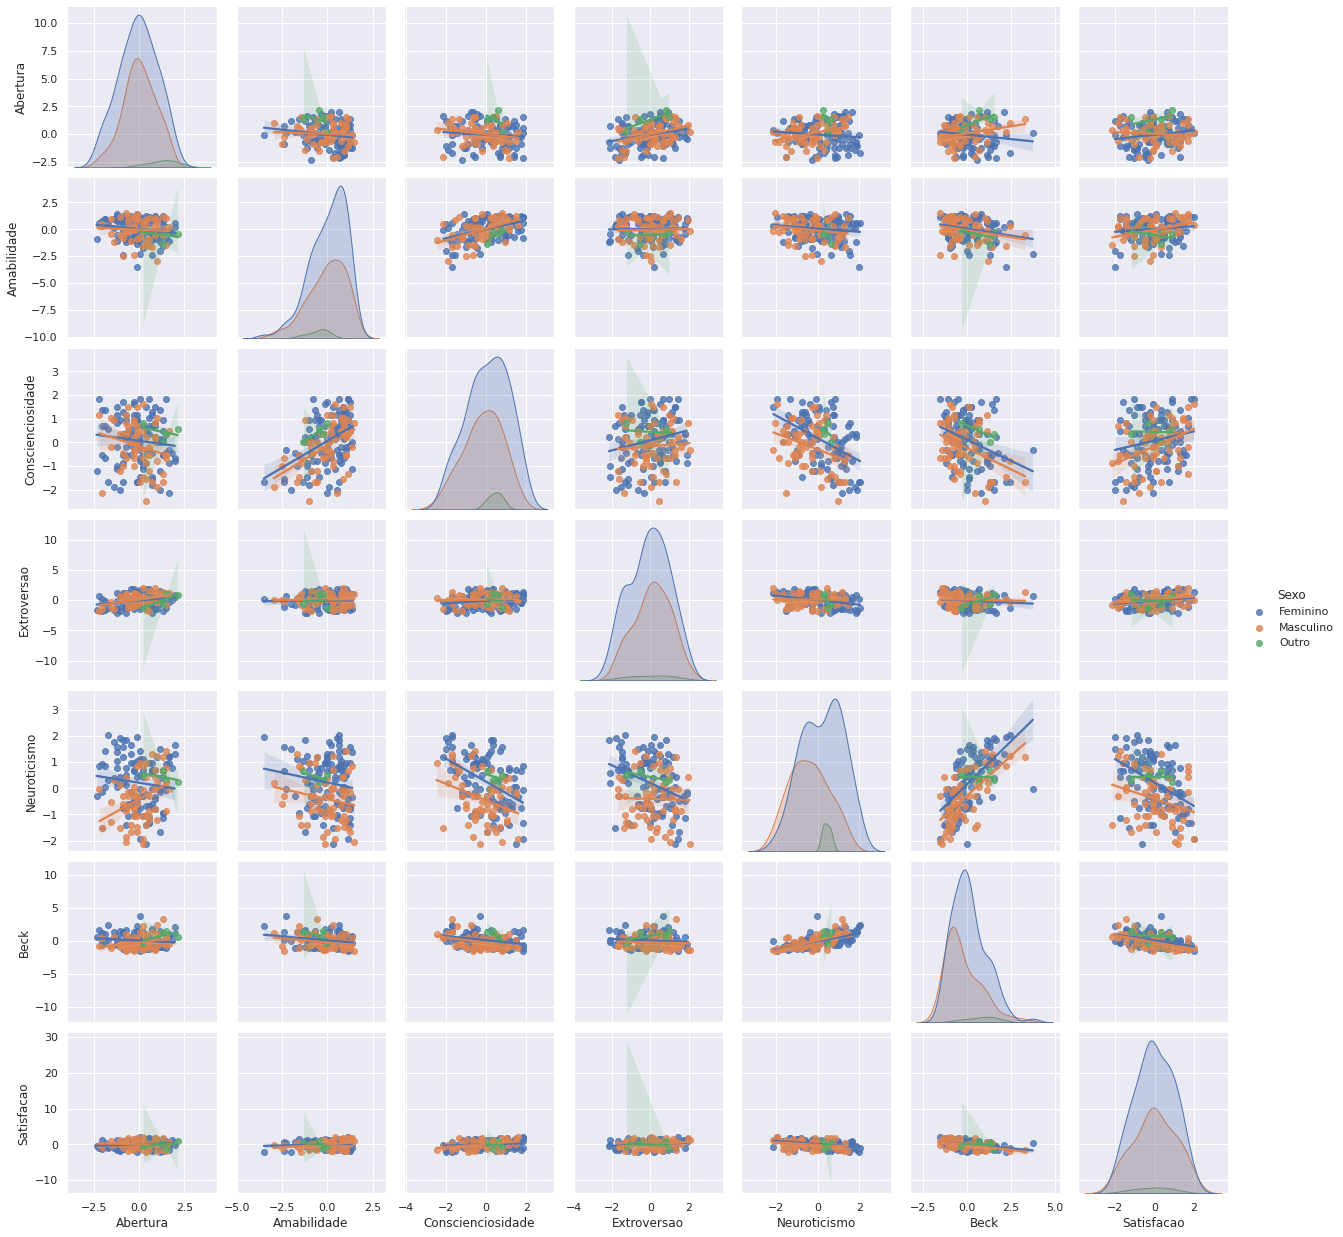

In [ ]:
sns.set_theme(style="darkgrid")

ax = sns.pairplot(escores_escalados, kind= "reg", diag_kind= 'kde', hue= "Sexo", corner = False)
ax

In [ ]:
escores_escalados.corr() # pearson

,Abertura,Amabilidade,Conscienciosidade,Extroversao,Neuroticismo,Beck,Satisfacao
Abertura,1.000000,-0.150648,-0.133478,0.325265,0.033414,0.028603,0.084239
Amabilidade,-0.150648,1.000000,0.451435,0.026473,-0.147170,-0.251758,0.203681
Conscienciosidade,-0.133478,0.451435,1.000000,0.151138,-0.351933,-0.317707,0.257730
Extroversao,0.325265,0.026473,0.151138,1.000000,-0.256107,-0.102255,0.252171
Neuroticismo,0.033414,-0.147170,-0.351933,-0.256107,1.000000,0.656714,-0.362242
Beck,0.028603,-0.251758,-0.317707,-0.102255,0.656714,1.000000,-0.491070
Satisfacao,0.084239,0.203681,0.257730,0.252171,-0.362242,-0.491070,1.000000


In [ ]:
escores.corr() # pearson

,Abertura,Amabilidade,Conscienciosidade,Extroversao,Neuroticismo,Beck,Satisfacao
Abertura,1.000000,-0.150648,-0.133478,0.325265,0.033414,0.028603,0.084239
Amabilidade,-0.150648,1.000000,0.451435,0.026473,-0.147170,-0.251758,0.203681
Conscienciosidade,-0.133478,0.451435,1.000000,0.151138,-0.351933,-0.317707,0.257730
Extroversao,0.325265,0.026473,0.151138,1.000000,-0.256107,-0.102255,0.252171
Neuroticismo,0.033414,-0.147170,-0.351933,-0.256107,1.000000,0.656714,-0.362242
Beck,0.028603,-0.251758,-0.317707,-0.102255,0.656714,1.000000,-0.491070
Satisfacao,0.084239,0.203681,0.257730,0.252171,-0.362242,-0.491070,1.000000


Text(0.5, 1.0, 'Gráfico de correlação')

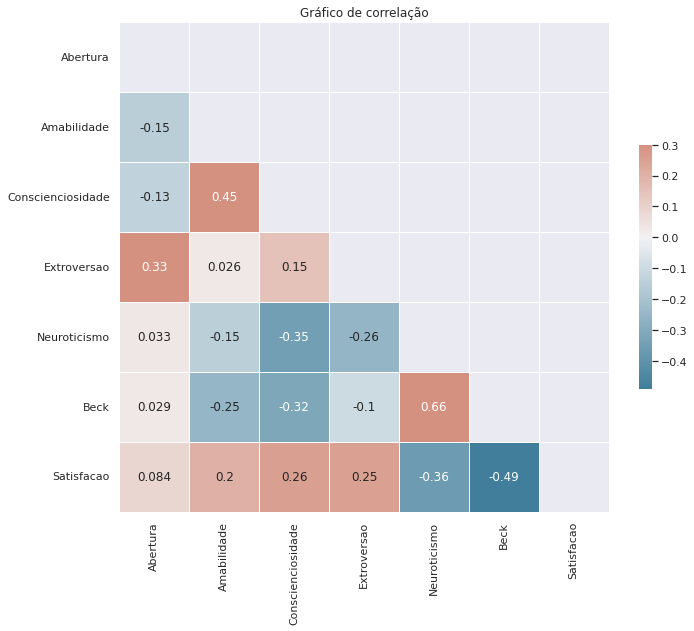

In [ ]:
corr = escores_escalados.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
ax.set_title("Gráfico de correlação")

## Análise fatorial


In [ ]:
inventario_perso_2 = pd.concat([inventario_abertura, inventario_amabilidade, inventario_consci, inventario_extro, inventario_neuro], axis= 1)
inventario_perso_2

,Prefiro experimentar comidas que não conheço do que aquelas que já estou habituado,Gosto de fazer o que nunca fiz antes,Acredito que regras foram feitas para serem quebradas,Procuro conhecer diferentes lugares da cidade que moro,Procuro comparecer em exposições artísticas,Me considero uma pessoa curiosa,Gosto de provar da culinária de diferentes culturas,Considero coisas perigosas interessantes,Tomo cuidado com o que digo,Busco tratar todas as pessoas com respeito,...,Costumo me preocupar muito com acontecimentos passados,Me sinto responsável pelos acontecimentos ruins ao meu redor,Frequentemente sinto que atrapalho as pessoas ao meu redor,Costumo chorar sem motivo aparente,Fico nervoso/a com facilidade,Costumo me estressar com facilidade,"Frequentemente, sou confiante ao tomar decisões",Geralmente lido bem com as frustrações,Deixo de fazer coisas por medo de ser criticado,Tenho dificuldade de continuar as tarefas quando os problemas surgem
0,1,4,3,2,3,5,2,3,5,5,...,4,2,2,1,3,3,2,4,5,5
1,2,2,1,3,1,3,5,1,5,5,...,5,1,1,5,1,4,2,3,4,3
2,1,3,4,5,2,5,1,4,2,4,...,5,5,5,5,5,5,5,5,5,4
3,5,5,3,5,5,5,5,5,5,5,...,5,5,5,5,4,5,4,3,4,5
4,1,2,1,4,3,5,5,3,4,5,...,4,4,3,5,5,5,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2,4,1,5,4,4,4,1,3,5,...,3,3,2,2,3,2,2,3,2,2
166,1,3,1,1,1,4,1,1,5,5,...,5,3,4,4,5,5,2,3,1,5
167,1,1,1,1,1,1,5,1,5,5,...,4,5,2,5,5,5,3,3,1,4
168,2,5,4,3,3,5,5,3,5,5,...,4,1,1,4,3,3,2,2,4,4


In [ ]:
_,kmo_model=calculate_kmo(inventario_perso_2)
kmo_model

/usr/local/lib/python3.9/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7896719695290823

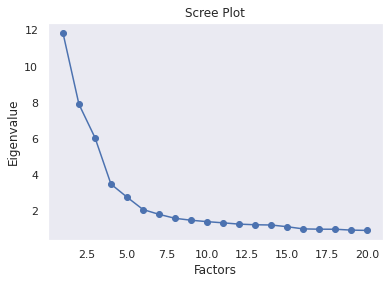

In [ ]:
fatorizador = FactorAnalyzer(n_factors=21, rotation= 'oblimin')
fatorizador.fit(inventario_perso_2)
# Check Eigenvalues
ev, v = fatorizador.get_eigenvalues()

plt.scatter(range(1,21),ev[:20])
plt.plot(range(1,21),ev[:20] )
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors= 5, rotation= 'oblimin',  )
fa.fit(inventario_perso)

fa_matrix_componentes = pd.DataFrame(fa.loadings_,
                                     columns= ["FA{}".format(i) for i in range(1,5+1)],
                                     
                                     )
fa_matrix_componentes

# renomear o índice para melhorar a leitura da informação

,FA1,FA2,FA3,FA4,FA5
0,0.134539,0.070316,0.243709,0.115378,0.417263
1,0.549817,-0.257664,-0.082017,-0.160127,-0.019727
2,-0.128528,0.676606,-0.054602,0.021883,-0.050147
3,0.635387,-0.020621,-0.077121,0.037156,-0.009372
4,0.365149,0.313638,-0.267726,0.000171,0.037912
...,...,...,...,...,...
104,-0.046046,0.068739,-0.009947,-0.007261,0.290786
105,0.075812,0.337525,0.077854,0.098450,0.129427
106,-0.016471,0.306962,0.422006,0.043446,0.102554
107,0.065126,0.062542,-0.357362,-0.033612,0.464487


array([<AxesSubplot:title={'center':'FA1'}>,
       <AxesSubplot:title={'center':'FA2'}>,
       <AxesSubplot:title={'center':'FA3'}>,
       <AxesSubplot:title={'center':'FA4'}>,
       <AxesSubplot:title={'center':'FA5'}>], dtype=object)

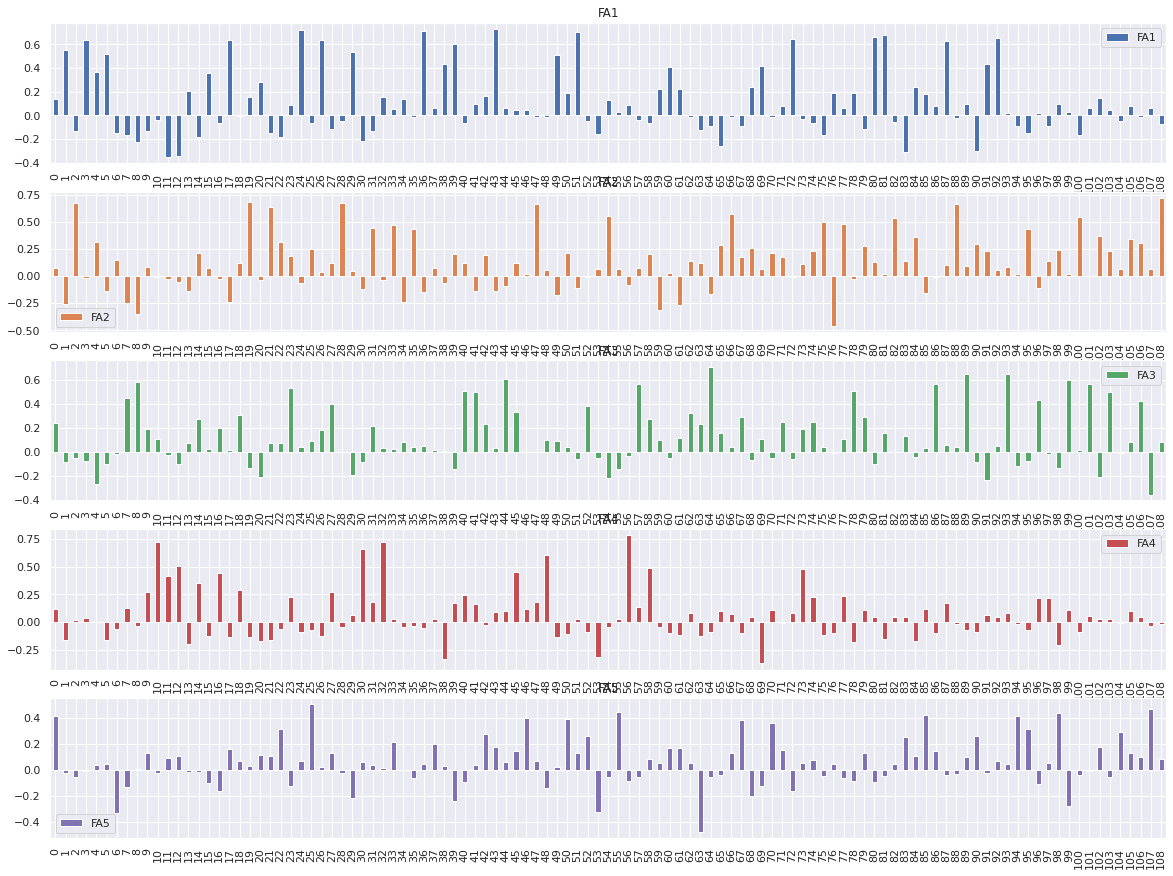

In [ ]:
fa_matrix_componentes.plot(subplots = True, kind = "bar", figsize= (20,15), sharex = False)

<AxesSubplot:>

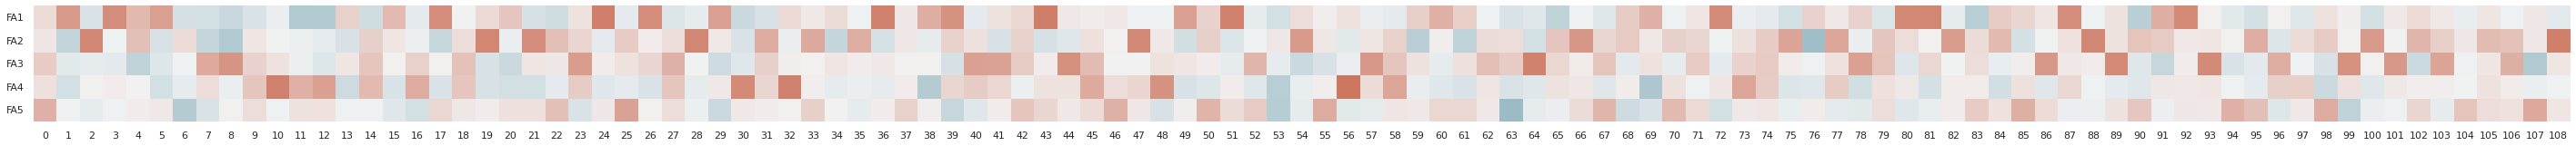

In [ ]:
plt.figure(figsize=(50,30))
# plot the heatmap for correlation matrix
ax = sns.heatmap(fa_matrix_componentes.T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=False, fmt='.2f', cbar= False)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0);
ax

# Tabela normativa

In [ ]:
colunas = ['Abertura', 'Amabilidade', 'Conscienciosidade','Extroversao', 'Neuroticismo', 'Beck', 'Satisfacao']

tabela_normativa = pd.DataFrame()

for constructo in colunas:
  tabela_normativa[constructo] = escores[constructo].quantile([x * 0.05 for x in range(21)])

tabela_normativa.index.rename("Percentil", inplace= True)
tabela_normativa

,Abertura,Amabilidade,Conscienciosidade,Extroversao,Neuroticismo,Beck,Satisfacao
Percentil,,,,,,,
0.00,1.3750,2.444444,1.545455,1.437500,1.294118,0.00,5.00
0.05,1.7500,3.358333,2.181818,1.875000,1.758824,3.00,8.45
0.10,2.2375,3.555556,2.354545,2.000000,1.994118,4.00,10.00
0.15,2.3750,3.722222,2.636364,2.187500,2.235294,5.00,12.35
0.20,2.5000,3.777778,2.818182,2.362500,2.352941,6.00,14.00
0.25,2.6250,3.902778,3.000000,2.687500,2.529412,7.00,15.25
0.30,2.8750,4.000000,3.090909,2.812500,2.588235,8.00,17.00
0.35,3.0000,4.111111,3.181818,2.937500,2.764706,9.00,18.00
0.40,3.0000,4.166667,3.327273,3.037500,2.941176,10.00,19.00


In [ ]:
colunas = ['Abertura', 'Amabilidade', 'Conscienciosidade','Extroversao', 'Neuroticismo', 'Beck', 'Satisfacao']

tabela_normativa2 = pd.DataFrame()

for constructo in colunas:
  tabela_normativa2[constructo] = escores[constructo].quantile([round(x * 0.05, 2) for x in range(21)])
  tabela_normativa2[constructo + "_z"] = escores_escalados[constructo].quantile([round(x * 0.05, 2) for x in range(21)])

tabela_normativa2.index.rename("Percentil", inplace= True)
tabela_normativa2

,Abertura,Abertura_z,Amabilidade,Amabilidade_z,Conscienciosidade,Conscienciosidade_z,Extroversao,Extroversao_z,Neuroticismo,Neuroticismo_z,Beck,Beck_z,Satisfacao,Satisfacao_z
Percentil,,,,,,,,,,,,,,
0.00,1.3750,-2.348670,2.444444,-3.498607,1.545455,-2.467466,1.437500,-2.166444,1.294118,-2.132366,0.00,-1.540097,5.00,-2.165708
0.05,1.7500,-1.868003,3.358333,-1.713558,2.181818,-1.675588,1.875000,-1.630240,1.758824,-1.609112,3.00,-1.209382,8.45,-1.684940
0.10,2.2375,-1.243136,3.555556,-1.328335,2.354545,-1.460650,2.000000,-1.477039,1.994118,-1.344174,4.00,-1.099143,10.00,-1.468943
0.15,2.3750,-1.066892,3.722222,-1.002794,2.636364,-1.109961,2.187500,-1.247237,2.235294,-1.072612,5.00,-0.988904,12.35,-1.141464
0.20,2.5000,-0.906670,3.777778,-0.894280,2.818182,-0.883710,2.362500,-1.032756,2.352941,-0.940142,6.00,-0.878666,14.00,-0.911532
0.25,2.6250,-0.746447,3.902778,-0.650124,3.000000,-0.657459,2.687500,-0.634433,2.529412,-0.741439,7.00,-0.768427,15.25,-0.737341
0.30,2.8750,-0.426003,4.000000,-0.460225,3.090909,-0.544333,2.812500,-0.481232,2.588235,-0.675204,8.00,-0.658189,17.00,-0.493473
0.35,3.0000,-0.265781,4.111111,-0.243198,3.181818,-0.431208,2.937500,-0.328031,2.764706,-0.476500,9.00,-0.547950,18.00,-0.354120
0.40,3.0000,-0.265781,4.166667,-0.134685,3.327273,-0.250207,3.037500,-0.205470,2.941176,-0.277796,10.00,-0.437712,19.00,-0.214767


In [ ]:
escores.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
print([round(x, 2) for x in tabela_normativa.index])

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [ ]:
tabela_normativa3 = pd.concat([tabela_normativa2, escores.describe()])
tabela_normativa3.index =  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
tabela_normativa3.to_excel("tabela_normativa.xlsx")
tabela_normativa3

,Abertura,Abertura_z,Amabilidade,Amabilidade_z,Conscienciosidade,Conscienciosidade_z,Extroversao,Extroversao_z,Neuroticismo,Neuroticismo_z,Beck,Beck_z,Satisfacao,Satisfacao_z
0.0,1.375000,-2.348670,2.444444,-3.498607,1.545455,-2.467466,1.437500,-2.166444,1.294118,-2.132366,0.000000,-1.540097,5.000000,-2.165708
0.05,1.750000,-1.868003,3.358333,-1.713558,2.181818,-1.675588,1.875000,-1.630240,1.758824,-1.609112,3.000000,-1.209382,8.450000,-1.684940
0.1,2.237500,-1.243136,3.555556,-1.328335,2.354545,-1.460650,2.000000,-1.477039,1.994118,-1.344174,4.000000,-1.099143,10.000000,-1.468943
0.15,2.375000,-1.066892,3.722222,-1.002794,2.636364,-1.109961,2.187500,-1.247237,2.235294,-1.072612,5.000000,-0.988904,12.350000,-1.141464
0.2,2.500000,-0.906670,3.777778,-0.894280,2.818182,-0.883710,2.362500,-1.032756,2.352941,-0.940142,6.000000,-0.878666,14.000000,-0.911532
0.25,2.625000,-0.746447,3.902778,-0.650124,3.000000,-0.657459,2.687500,-0.634433,2.529412,-0.741439,7.000000,-0.768427,15.250000,-0.737341
0.3,2.875000,-0.426003,4.000000,-0.460225,3.090909,-0.544333,2.812500,-0.481232,2.588235,-0.675204,8.000000,-0.658189,17.000000,-0.493473
0.35,3.000000,-0.265781,4.111111,-0.243198,3.181818,-0.431208,2.937500,-0.328031,2.764706,-0.476500,9.000000,-0.547950,18.000000,-0.354120
0.4,3.000000,-0.265781,4.166667,-0.134685,3.327273,-0.250207,3.037500,-0.205470,2.941176,-0.277796,10.000000,-0.437712,19.000000,-0.214767
0.45,3.125000,-0.105558,4.222222,-0.026171,3.545455,0.021294,3.187500,-0.021628,3.058824,-0.145327,11.000000,-0.327473,20.000000,-0.075414


In [ ]:
#a["X"] = escores.Abertura.quantile([x * 0.05 for x in range(21)])
#a['y'] = escores.Abertura.quantile([x * 0.05 for x in range(21)])
#a

NameError: ignored

# Cluster

In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
dados_kmeans = escores_escalados[['Abertura',	'Amabilidade',	'Conscienciosidade',	'Extroversao',	'Neuroticismo']]
dados_kmeans

In [ ]:
def clustering_algorithm(numero_de_clusteres, dataset):
  kmeans = KMeans(n_clusters= numero_de_clusteres)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric="euclidean")
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return numero_de_clusteres, s, dbs, calinski

teste = []
for x in range(2,10):
  teste.append(clustering_algorithm(x, dados_kmeans))

teste

In [ ]:
teste_validacao = pd.DataFrame(teste)
teste_validacao.columns = ["Numero_de_clusteres", "Silhueta", "DBS", "Calinski"]
teste_validacao.plot(subplots= True, figsize= [15,15])

In [ ]:
inercia = []

faixa = range(1,15)
for i in faixa:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(dados_kmeans)
  dist = kmeans.inertia_
  inercia.append(dist)

plt.figure(figsize=(16,8))
plt.plot(faixa, inercia, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Método Cotovelo (method elbow) mostrando o melhor k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 4)
labels = kmeans.fit_predict(dados_kmeans)
labels

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_,
                         columns= ['Abertura',	'Amabilidade',	'Conscienciosidade',	'Extroversao',	'Neuroticismo'])
centroids.plot(subplots = True, kind= "bar", sharex= False, figsize = (15,15),)

In [ ]:
dados_kmeans['label'] = labels
dados_kmeans["Beck"] = escores.Beck
dados_kmeans['Satisfacao'] = escores.Satisfacao

In [ ]:
sns.histplot(dados_kmeans.label)

In [ ]:
ax = sns.pairplot(dados_kmeans, kind= "reg", diag_kind= 'kde', hue= "label", corner = False)
ax

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(dados_kmeans) 

In [ ]:
sns.set(rc={"figure.figsize" : (13,13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue= dados_kmeans.label, 
                palette = "Set1"
               )

# Regressaõ

In [ ]:
dados2 = pd.read_excel('Construção de intrumentos.xlsx')

In [ ]:
dados2['Gênero'].describe()

In [ ]:
dados2.Gênero.value_counts()

In [ ]:
dados2.Gênero.value_counts(normalize= True)

In [ ]:
dados2['Gênero'].describe()

In [ ]:
dados_regressao = escores[['Abertura',	'Amabilidade',	'Conscienciosidade',	'Extroversao',	'Neuroticismo']]
dados_regressao['Beck'] = escores.Beck
dados_regressao['Satisfacao'] = escores.Satisfacao
dados_regressao['Idade'] = dados2['Idade (apenas números)']
dados_regressao["Sexo"] = escores_escalados.Sexo

dados_regressao.dropna(inplace= True)
#dados_regressao['Idade'] = [int(x) for x in dados_regressao['Idade']]

In [ ]:
dicto = {'Feminino' : 0,
        "Masculino" : 1}
dados_regressao = dados_regressao[dados_regressao["Sexo"] != "Outro"]
dados_regressao.Sexo.replace(dicto, inplace= True)

In [ ]:
y_satisfação = dados_regressao.Satisfacao
y_beck = dados_regressao.Beck

X = dados_regressao[['Abertura',	'Amabilidade',	'Conscienciosidade',	'Extroversao',	'Neuroticismo', 'Idade', "Sexo"]]

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

X_train_com_constante = sm.add_constant(X)
modelo_statsmodels = sm.OLS(y_beck, X_train_com_constante, hasconst= True).fit()
print(modelo_statsmodels.summary())

In [ ]:
previsao = modelo_statsmodels.predict(X_train_com_constante)
real = y_beck
linha = range(int(previsao.min()), int(previsao.max()))

sns.scatterplot(x= previsao, y= real)
sns.lineplot(x= linha, y =linha, color = "r")

In [ ]:
X_train_com_constante = sm.add_constant(X)
modelo_statsmodels = sm.OLS(y_satisfação, X_train_com_constante, hasconst= True).fit()
print(modelo_statsmodels.summary())

In [ ]:
previsao = modelo_statsmodels.predict(X_train_com_constante)
real = y_satisfação
linha = range(int(previsao.min()), int(previsao.max()))

sns.scatterplot(x= previsao, y= real)
sns.lineplot(x= linha, y =linha, color = "r")

# paralela

In [ ]:
_,kmo_model=calculate_kmo(inventario_perso)
kmo_model

In [ ]:
fatorizador = FactorAnalyzer(n_factors=21, rotation= 'oblimin')
fatorizador.fit(inventario_perso)
# Check Eigenvalues
ev, v = fatorizador.get_eigenvalues()
ev

In [ ]:
plt.scatter(range(1,21),ev[:20])
plt.plot(range(1,21),ev[:20] )
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors= 5, rotation= 'oblimin',  )
fa.fit(inventario_perso)

In [ ]:
fa_matrix_componentes = pd.DataFrame(fa.loadings_,
                                     columns= ["FA{}".format(i) for i in range(1,5+1)],
                                     
                                     )
fa_matrix_componentes

# renomear o índice para melhorar a leitura da informação

In [ ]:
fa_matrix_componentes.plot(subplots = True, kind = "bar", figsize= (20,15), sharex = False,)

In [ ]:
fa_matrix_componentes.reset_index(inplace= True)
fa_matrix_componentes['index'] = inventario_perso.columns
fa_matrix_componentes.head(40)

In [ ]:
fa1 = fa_matrix_componentes.query("FA1 > 0.4 or FA1 < -0.4")
fa1.sort_values("FA1", ascending= False)

In [ ]:
fa1[fa1.FA1 < 0]['index']

In [ ]:
itens_neuro = fa1['index']
itens_neuro_invertidos = fa1[fa1.FA1 < 0]['index'] 
inventario_neuro = inventario_perso[itens_neuro]
inventario_neuro.columns

In [ ]:
fa2 = fa_matrix_componentes.query("FA2 > 0.4 or FA2 < -0.4")
fa2.sort_values("FA2", ascending= False)

In [ ]:
itens_extroversao = fa2['index']
itens_extroversao_invertidos = fa2[fa2.FA2 < 0]['index']
inventario_extro = inventario_perso[itens_extroversao]
inventario_extro.columns

In [ ]:
fa3 = fa_matrix_componentes.query("FA3 > 0.4 or FA3 < -0.4")
fa3.sort_values("FA3", ascending= False)

In [ ]:
itens_amabilidade = fa3['index']
itens_amabilidade_invertidos = fa3[fa3.FA3 < 0]['index']
inventario_amabilidade = inventario_perso[itens_amabilidade]
inventario_amabilidade.columns

In [ ]:
fa4 = fa_matrix_componentes.query("FA4 > 0.4 or FA4 < -0.4")
fa4.sort_values("FA4", ascending= False)

In [ ]:
itens_conscie = fa4['index']
itens_conscie_invertidos = fa4[fa4.FA4 < 0]['index']
inventario_consci = inventario_perso[itens_conscie]
inventario_consci.columns

In [ ]:
fa5 = fa_matrix_componentes.query("FA5 > 0.4 or FA5 < -0.4")
fa5.sort_values("FA5", ascending= False)

In [ ]:
itens_abertura = fa5['index']
itens_abertura_invertidos = fa5[fa5.FA5 < 0]['index']
inventario_abertura = inventario_perso[itens_abertura]
inventario_abertura.columns

In [ ]:
instrumento_perso_fator = pd.concat([inventario_abertura, inventario_amabilidade, inventario_consci, inventario_extro, inventario_neuro],
                                    axis= 1)
instrumento_perso_fator.head()

In [ ]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [ ]:
def inverte_numero(lista_de_numeros): # função que inverte as posições entre 1 e 5
  lista_de_numeros_invertidos = []    # deve existe solução mais sofistifcada por ai
  
  for x in lista_de_numeros:
    return escore - 6
    
  return lista_de_numeros_invertidos

In [ ]:
for x in range(0, len(itens_invertidos)):
  instrumento_perso_fator[itens_invertidos[x]] = inverte_numero(instrumento_perso_fator[itens_invertidos[x]])

In [ ]:
print("Alpha Abertura: ", cronbach_alpha(instrumento_perso_fator[itens_abertura]))
print("Alpha amabilidade: ", cronbach_alpha(instrumento_perso_fator[itens_amabilidade]))
print("Alpha concienciosidade: ", cronbach_alpha(instrumento_perso_fator[itens_conscie]))
print("Alpha extroversão: ", cronbach_alpha(instrumento_perso_fator[itens_extroversao]))
print("Alpha neuro: ", cronbach_alpha(instrumento_perso_fator[itens_neuro]))

## Nova análise

In [ ]:
novo_inventario_perso = pd.concat([inventario_abertura, inventario_amabilidade, inventario_consci, inventario_extro, inventario_neuro], axis= 1)
novo_inventario_perso

In [ ]:
_,kmo_model=calculate_kmo(novo_inventario_perso)
kmo_model

In [ ]:
fatorizador = FactorAnalyzer(n_factors=21, rotation= 'oblimin')
fatorizador.fit(novo_inventario_perso)
# Check Eigenvalues
ev, v = fatorizador.get_eigenvalues()
ev

In [ ]:
plt.scatter(range(1,21),ev[:20])
plt.plot(range(1,21),ev[:20] )
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors= 5, rotation= 'oblimin',  )
fa.fit(novo_inventario_perso)

fa_matrix_componentes = pd.DataFrame(fa.loadings_,
                                     columns = ["FA{}".format(i) for i in range(1,5+1)]
                                   
                                     
                                     )
fa_matrix_componentes

# renomear o índice para melhorar a leitura da informação

In [ ]:
fa_matrix_componentes.plot(subplots = True, kind = "bar", figsize= (20,15), sharex = False,)

In [ ]:
fa_matrix_componentes.reset_index(inplace= True)
fa_matrix_componentes['index'] = novo_inventario_perso.columns
fa_matrix_componentes.head()

In [ ]:
fa1 = fa_matrix_componentes.query("FA1 > 0.4 or FA1 < -0.4")
fa1.sort_values("FA1", ascending= False)

In [ ]:
itens_neuro = fa1['index']
itens_neuro_invertidos = fa1[fa1.FA1 < 0]['index'] 
inventario_neuro = novo_inventario_perso[itens_neuro]
inventario_neuro.columns

In [ ]:
fa2 = fa_matrix_componentes.query("FA2 > 0.4 or FA2 < -0.4")
fa2.sort_values("FA2", ascending= False)

In [ ]:
itens_extroversao = fa2['index']
itens_extroversao_invertidos = fa2[fa2.FA2 < 0]['index']
inventario_extro = inventario_perso[itens_extroversao]
inventario_extro.columns

In [ ]:
fa3 = fa_matrix_componentes.query("FA3 > 0.4 or FA3 < -0.4")
fa3.sort_values("FA3", ascending= False)

In [ ]:
itens_amabilidade = fa3['index']
itens_amabilidade_invertidos = fa3[fa3.FA3 < 0]['index']
inventario_amabilidade = inventario_perso[itens_amabilidade]
inventario_amabilidade.columns

In [ ]:
fa4 = fa_matrix_componentes.query("FA4 > 0.4 or FA4 < -0.4")
fa4.sort_values("FA4", ascending= False)

In [ ]:
itens_conscie = fa4['index']
itens_conscie_invertidos = fa4[fa4.FA4 < 0]['index']
inventario_consci = inventario_perso[itens_conscie]
inventario_consci.columns

In [ ]:
fa5 = fa_matrix_componentes.query("FA5 > 0.38 or FA5 < -0.38")
fa5.sort_values("FA5", ascending= False)

In [ ]:
itens_abertura = fa5['index']
itens_abertura_invertidos = fa5[fa5.FA5 < 0]['index']
inventario_abertura = inventario_perso[itens_abertura]
inventario_abertura.columns

In [ ]:
novo_instrumento_perso_fator = pd.concat([inventario_abertura, inventario_amabilidade, inventario_consci, inventario_extro, inventario_neuro],
                                    axis= 1)
novo_instrumento_perso_fator.head()

In [ ]:
for x in range(0, len(itens_invertidos)):
  novo_instrumento_perso_fator[itens_invertidos[x]] = inverte_numero(novo_instrumento_perso_fator[itens_invertidos[x]])

In [ ]:
print("Alpha Abertura: ", cronbach_alpha(novo_instrumento_perso_fator[itens_abertura]))
print("Alpha amabilidade: ", cronbach_alpha(novo_instrumento_perso_fator[itens_amabilidade]))
print("Alpha concienciosidade: ", cronbach_alpha(novo_instrumento_perso_fator[itens_conscie]))
print("Alpha extroversão: ", cronbach_alpha(novo_instrumento_perso_fator[itens_extroversao]))
print("Alpha neuro: ", cronbach_alpha(novo_instrumento_perso_fator[itens_neuro]))